<a href="https://colab.research.google.com/github/JUSTSUJAY/pytorch_a2z/blob/main/03_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Linear Regression with PyTorch
## 1. About Linear Regression


### 1.1 Simple Linear Regression Basics
- Allows us to understand **relationship** between two **continuous variables**
- Example
    - x: independent variable
        - weight
    - y: dependent variable
        - height
- $y = \alpha x + \beta$

### 1.2 Example of simple linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

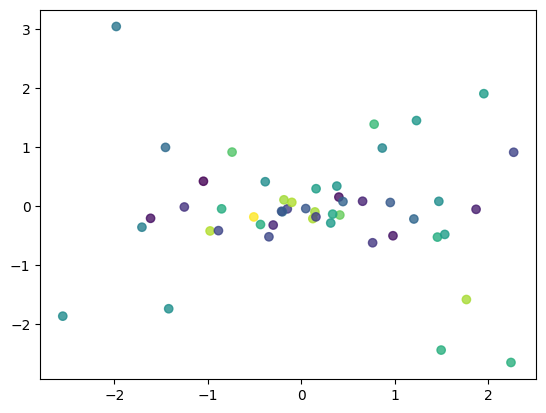

In [2]:
np.random.seed(0)
random_samples = 50
x = np.random.randn(random_samples)
y = x*np.random.randn(random_samples)

colors = np.random.randn(random_samples)
plt.scatter(x,y,c = colors, alpha = 0.8)

In [3]:
a = np.random.randn(5)
print(a)
print(np.unique(a))
print(np.unique(np.ones(5)))
print(np.unique(np.ones((5,5))))

[-0.06824161  1.71334272 -0.74475482 -0.82643854 -0.09845252]
[-0.82643854 -0.74475482 -0.09845252 -0.06824161  1.71334272]
[1.]
[1.]


As you can see, `np.unique` is used to get the sorted set

First let's fit a single degree linear function to our random points we samples above, for which we need the help of these functions

1. `np.polyfit(x,y,1)` = Will fit a polynomial of degree 1 to datapoints x,y and will return the coefficients(slope and intercept in this case)
2. `np.poly1d(params)` = creates a polynomial function from the parameters returned by earlier function.

after obtaining the function we need to pass the input values of x, sorted using `np.unique`

In [4]:
np.polyfit(x,y,1)

array([-0.06699181, -0.05128219])

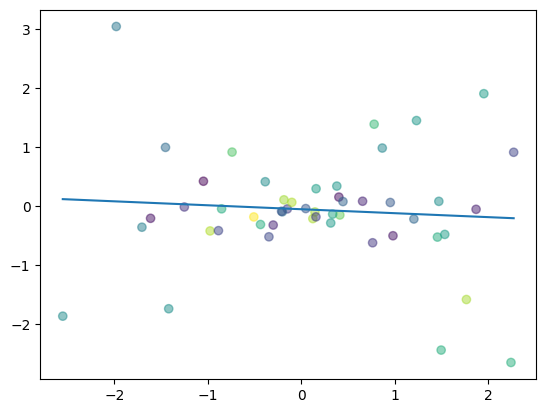

In [5]:
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

### 1.3 Aim of Linear Regression
- Minimize the distance between the points and the line ($y = \alpha x + \beta$)
- Adjusting
    - Coefficient: $\alpha$
    - Bias/intercept: $\beta$

## 2. Building a Linear Regression Model with PyTorch

### 2.1 Example
- Coefficient: $\alpha = 2$
- Bias/intercept: $\beta = 1$
- Equation: $y = 2x + 1$

### 2.2 Building a Toy Dataset

In [6]:
x_values = [i for i in range(11)]

In [7]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [8]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [9]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [10]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

$y = 2x + 1$

In [11]:
y_values = [2*i + 1 for i in x_values]

In [12]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [13]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [14]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

### 2.3 Building Model

**Critical Imports**

In [15]:
import torch
import torch.nn as nn

**Create Model**


1. Linear Model
 - True Eq: $y = 2x + 1$

2. Forward
  - Ex.
    - Input: $x = 1 $
    - Output: $\hat y = ?$

In [16]:
class LR(nn.Module):
  def __init__(self, input_dimension, output_dimension):
    super(LR, self).__init__()
    self.linear = nn.Linear(input_dimension, output_dimension)

  def forward(self,x):
    return self.linear(x)


**Instantiate Model Class**
- input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- desired output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

Our input and output are to be mapped 1 to 1

In [17]:
ip_dim, op_dim = 1,1
model = LR(ip_dim,op_dim)

**Instantiate Loss Class**
- MSE Loss: Mean Squared Error
- $MSE = \frac{1}{n} \sum_{i=1}^n(\hat y_i - y_i)$
    - $\hat y$: prediction
    - $y$: true value

In [18]:
loss = nn.MSELoss() # Mean squared Loss

**Instantiate Optimizer Class**

- Simplified Eq:
  - $\theta = \theta - \eta \cdot \nabla_\theta $
    - $\theta$: parameters (our variables)
    - $\eta$: learning rate (how fast we want to learn)
    - $\nabla_\theta$: parameters' gradients
- Even Simpler Eq:
  - `parameters = parameters - learning_rate * parameters_gradients`
    - parameters: $\alpha$ and $\beta$ in $ y = \alpha x + \beta$
    - desired parameters: $\alpha = 2$ and $\beta = 1$ in $ y = 2x + 1$


Our goal in this process is to bring $\alpha$ ~ 2 and $\beta$ ~ 1
  

In [19]:
lr = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

**Train Model**
- 1 epoch: going through the whole x_train data once
    - 100 epochs:
        - 100x mapping `x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`
        
- Process
    1. Convert inputs/labels to tensors with gradients
    2. Clear gradient buffets
    3. Get output given inputs
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [20]:
epochs = 100

In [21]:
for epoch in range(epochs):
  epoch += 1
  # numpy -> Tensors
  input = torch.from_numpy(x_train).requires_grad_()
  targets = torch.from_numpy(y_train)
  # As we backpropagate, the gradients add up and we do not want that, so for each backpropagation loop it needs to be set to 0 because only then 0+new gradient will be the
  # grad of that epoch
  optimizer.zero_grad()
  # get the outputs
  outputs = model(input) # this automatically calls for the forward function.
  losses = loss(outputs, targets)
  # as we have zeroed the gradients earlier, now backpropagate and update the parameters.
  losses.backward()
  optimizer.step()
  # let's print to track how losses reduce as epochs increase
  print('epoch {}, loss {}'.format(epoch, losses.item()))



epoch 1, loss 48.6278190612793
epoch 2, loss 4.049740314483643
epoch 3, loss 0.41271594166755676
epoch 4, loss 0.11513534188270569
epoch 5, loss 0.08995285630226135
epoch 6, loss 0.08699914813041687
epoch 7, loss 0.08586869388818741
epoch 8, loss 0.0848967656493187
epoch 9, loss 0.08394786715507507
epoch 10, loss 0.08301016688346863
epoch 11, loss 0.08208317309617996
epoch 12, loss 0.08116665482521057
epoch 13, loss 0.08026029914617538
epoch 14, loss 0.07936393469572067
epoch 15, loss 0.07847774773836136
epoch 16, loss 0.07760149985551834
epoch 17, loss 0.0767347663640976
epoch 18, loss 0.0758780762553215
epoch 19, loss 0.07503055036067963
epoch 20, loss 0.07419273257255554
epoch 21, loss 0.07336419075727463
epoch 22, loss 0.07254514843225479
epoch 23, loss 0.07173505425453186
epoch 24, loss 0.07093394547700882
epoch 25, loss 0.07014178484678268
epoch 26, loss 0.06935843825340271
epoch 27, loss 0.06858410686254501
epoch 28, loss 0.06781814247369766
epoch 29, loss 0.06706079095602036
ep

**Compare Data**

In [22]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.6766583],
       [ 2.7232223],
       [ 4.7697864],
       [ 6.8163505],
       [ 8.862915 ],
       [10.909479 ],
       [12.956043 ],
       [15.002607 ],
       [17.049171 ],
       [19.095736 ],
       [21.1423   ]], dtype=float32)

In [23]:
# y = 2x + 1
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

**Plot Graph**

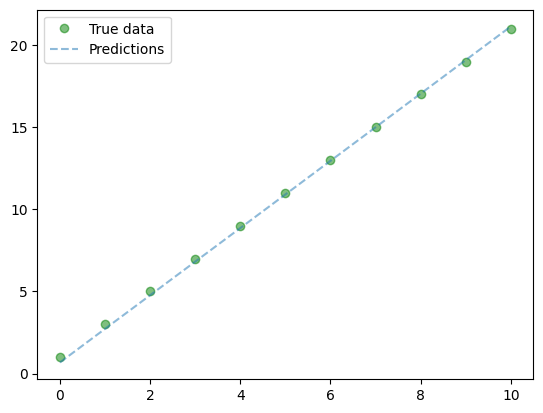

In [24]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

**Save Model**

In [25]:
MODEL_SAVE = False
if MODEL_SAVE:
  torch.save(model.state_dict(), 'LR.pkl')

In [26]:
model.state_dict() # a dictionary of parameters in key value pairs

OrderedDict([('linear.weight', tensor([[2.0466]])),
             ('linear.bias', tensor([0.6767]))])

**Load Model**

In [27]:
MODEL_LOAD = False
if MODEL_LOAD:
  model = torch.load_state_dict(torch.load('LR.pkl'))

## 3. Building a Linear Regression Model with PyTorch (GPU)



**CPU Summary**

In [28]:
import torch
import torch.nn as nn
# implement  what we implemented earlier in this cell, comments for your guidance are provided.
'''
STEP 1: CREATE MODEL CLASS
'''

'''
STEP 2: INSTANTIATE MODEL CLASS
'''

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

'''
STEP 5: TRAIN THE MODEL
'''


'\nSTEP 5: TRAIN THE MODEL\n'

GPU: 2 things must be on GPU
- `model`
- `tensors with gradients`

In [29]:
import torch
import torch.nn as nn
import numpy as np

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable

    #######################
    #  USE GPU FOR MODEL  #
    #######################
    inputs = torch.from_numpy(x_train).to(device)
    labels = torch.from_numpy(y_train).to(device)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    # Logging
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 64.45423126220703
epoch 2, loss 5.836786270141602
epoch 3, loss 1.0490763187408447
epoch 4, loss 0.6521599292755127
epoch 5, loss 0.6134581565856934
epoch 6, loss 0.6040445566177368
epoch 7, loss 0.5970903038978577
epoch 8, loss 0.5904057025909424
epoch 9, loss 0.5838115215301514
epoch 10, loss 0.5772919058799744
epoch 11, loss 0.5708453059196472
epoch 12, loss 0.5644707083702087
epoch 13, loss 0.5581673979759216
epoch 14, loss 0.5519344806671143
epoch 15, loss 0.5457711815834045
epoch 16, loss 0.5396770238876343
epoch 17, loss 0.5336503386497498
epoch 18, loss 0.5276906490325928
epoch 19, loss 0.5217981934547424
epoch 20, loss 0.5159713625907898
epoch 21, loss 0.5102096796035767
epoch 22, loss 0.5045123100280762
epoch 23, loss 0.4988785684108734
epoch 24, loss 0.4933072030544281
epoch 25, loss 0.4877987802028656
epoch 26, loss 0.48235180974006653
epoch 27, loss 0.47696542739868164
epoch 28, loss 0.47163912653923035
epoch 29, loss 0.46637266874313354
epoch 30, loss 0.4611

# Summary

- Simple **linear regression basics**
    - $y = Ax + B$
    - $y = 2x + 1$
- **Example** of simple linear regression
- **Aim** of linear regression
    - Minimizing distance between the points and the line
        - Calculate "distance" through `MSE`
        - Calculate `gradients`
        - Update parameters with `parameters = parameters - learning_rate * gradients`
        - Slowly update parameters $A$ and $B$ model the linear relationship between $y$ and $x$ of the form $y = 2x + 1$
- Built a linear regression **model** in **CPU and GPU**
    - Step 1: Create Model Class
    - Step 2: Instantiate Model Class
    - Step 3: Instantiate Loss Class
    - Step 4: Instantiate Optimizer Class
    - Step 5: Train Model
- Important things to be on **GPU**
    - `model`
    - `tensors with gradients`
- How to bring to **GPU**?
    - `model_name.cuda()`
    - `variable_name.cuda()`